In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [9]:
# Load and preprocess dataset
df = pd.read_csv("emails.csv")
df.drop(columns=['Email No.'], inplace=True)
df.fillna(df.mean(), inplace=True)  # Fill missing values with mean

# Data cleaning: filter non-spam and spam emails
non_spam_emails = df[df['Prediction'] == 1].drop(columns=['Prediction'])
spam_emails = df[df['Prediction'] == 0].drop(columns=['Prediction'])

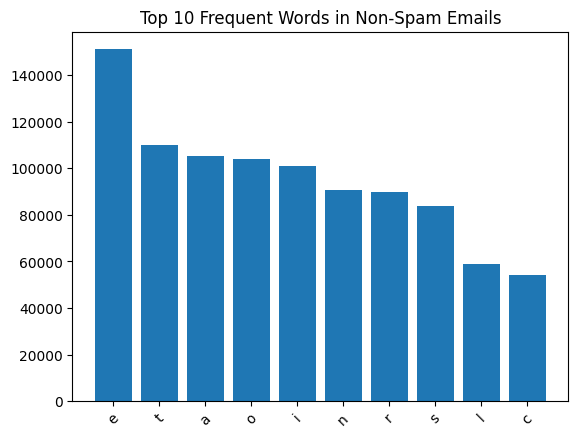

In [ ]:
# Visualize frequent words in non-spam emails
top_10_non_spam_words = non_spam_emails.sum().nlargest(10)
plt.bar(top_10_non_spam_words.index, top_10_non_spam_words.values)
plt.title('Top 10 Frequent Words in Non-Spam Emails')
plt.show()


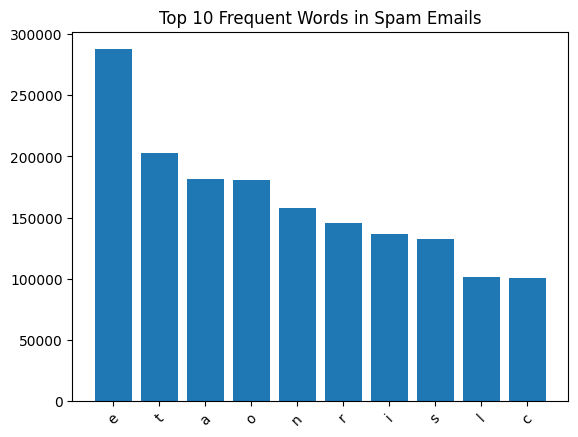

In [ ]:
# Visualize frequent words in spam emails
top_10_spam_words = spam_emails.sum().nlargest(10)
plt.bar(top_10_spam_words.index, top_10_spam_words.values)
plt.title('Top 10 Frequent Words in Spam Emails')
plt.show()

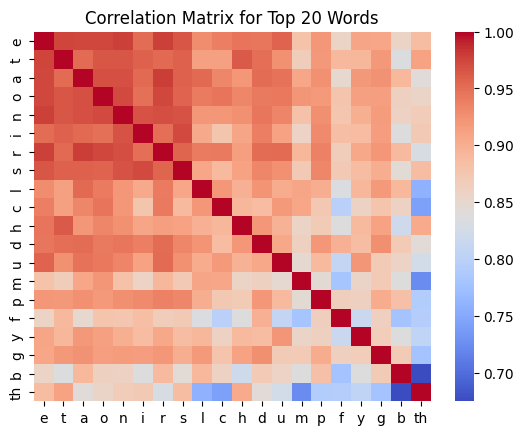

In [ ]:
# Correlation matrix for top 20 frequent words
#top_20_words = df.drop(columns=['Prediction']).sum().nlargest(20).index
#sns.heatmap(df[top_20_words].corr(), cmap='coolwarm', annot=False)
#plt.title('Correlation Matrix for Top 20 Words')
#plt.show()

In [13]:
# Split data
X = df.drop("Prediction", axis=1)
y = df["Prediction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Model training and evaluation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train models
models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB()
}
accuracies = {}

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.81      0.88       719
           1       0.68      0.92      0.78       316

    accuracy                           0.84      1035
   macro avg       0.82      0.87      0.83      1035
weighted avg       0.87      0.84      0.85      1035

SVM Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       719
           1       0.98      0.79      0.88       316

    accuracy                           0.93      1035
   macro avg       0.95      0.89      0.92      1035
weighted avg       0.94      0.93      0.93      1035

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       719
           1       0.84      0.95      0.89       316

    accuracy                           0.93      1035
   macro avg       0.91      0.93      

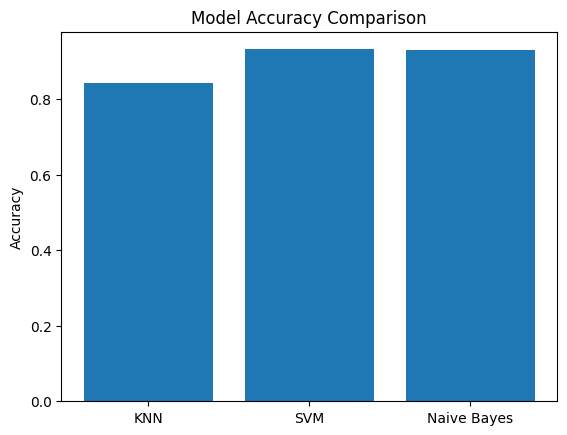

In [18]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[name] = accuracy_score(y_test, y_pred)
    print(f"{name} Classification Report:\n{classification_report(y_test, y_pred)}")

# Plot accuracy comparison
plt.bar(accuracies.keys(), accuracies.values())
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()